In [1]:
from astropy.io import fits
fits_file = fits.open('lightcurve_1.fits')
fits_file.info()

Filename: lightcurve_1.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      55   ()      
  1  LIGHTCURVE    1 BinTableHDU    156   3862R x 20C   [D, E, J, E, E, E, E, E, E, J, D, E, D, E, D, E, D, E, E, E]   
  2  APERTURE      1 ImageHDU        49   (10, 9)   int32   


In [2]:
image_data = fits_file[2].data 
print (image_data)

[[ 9  9  9  9  9  9  9  9  9  9]
 [ 9  9  9  9  9  9  9  9  9  9]
 [ 9  9  9  9 13 13 13 13  9  9]
 [ 9  9  9 13 13 15 15 13  9  9]
 [ 9  9  9 13 15 15 15 13  9  9]
 [ 9  9  9 13 13 15 15 13  9  9]
 [ 9  9  9  9 13 13 13 13  9  9]
 [ 9  9  9  9  9  9  9  9  9  9]
 [ 0  9  9  9  9  9  9  9  9  9]]


In [3]:
k = fits_file[1].data.columns
print(k)

ColDefs(
    name = 'TIME'; format = 'D'; unit = 'BJD - 2454833'; disp = 'D14.7'
    name = 'TIMECORR'; format = 'E'; unit = 'd'; disp = 'E13.6'
    name = 'CADENCENO'; format = 'J'; disp = 'I10'
    name = 'SAP_FLUX'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'SAP_FLUX_ERR'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'SAP_BKG'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'SAP_BKG_ERR'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'PDCSAP_FLUX'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'PDCSAP_FLUX_ERR'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'SAP_QUALITY'; format = 'J'; disp = 'B16.16'
    name = 'PSF_CENTR1'; format = 'D'; unit = 'pixel'; disp = 'F10.5'
    name = 'PSF_CENTR1_ERR'; format = 'E'; unit = 'pixel'; disp = 'E14.7'
    name = 'PSF_CENTR2'; format = 'D'; unit = 'pixel'; disp = 'F10.5'
    name = 'PSF_CENTR2_ERR'; format = 'E'; unit = 'pixel'; disp = 'E14.7'
    name = 'MOM_CENTR1'; format = 'D'; uni

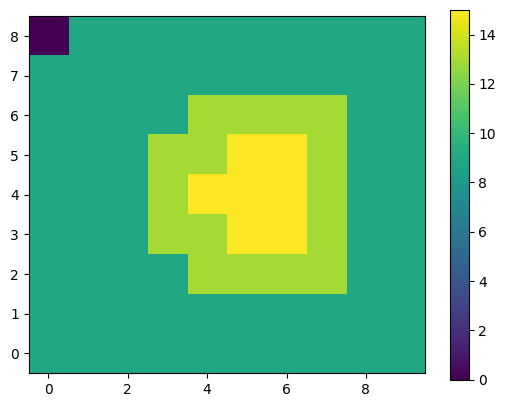

In [8]:
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(image_data, origin = 'lower')
plt.colorbar()
plt.show()


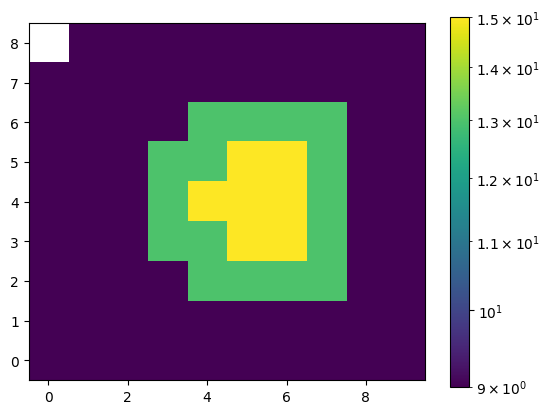

In [9]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

plt.figure()
plt.imshow(image_data, origin = 'lower', norm = LogNorm())
plt.colorbar()
plt.show()

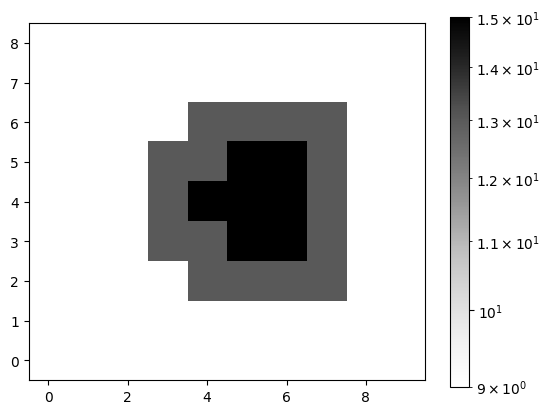

In [10]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

plt.figure()
plt.imshow(image_data, origin = 'lower', norm = LogNorm(), cmap = 'Greys')
plt.colorbar()
plt.show()

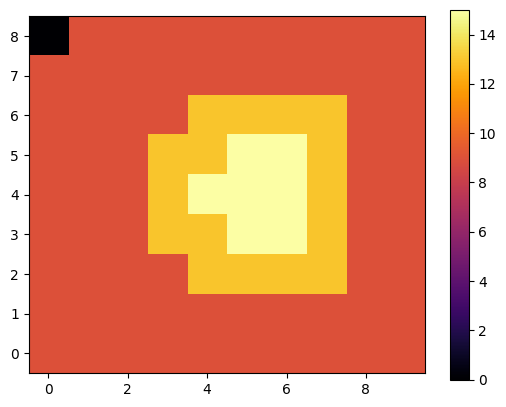

In [15]:
from astropy.io import fits
import matplotlib.pyplot as plt
fits_file = fits.open('lightcurve_1.fits')
image_data = fits_file[2].data

plt.figure()
plt.imshow(image_data, origin = 'lower', cmap = 'inferno')
plt.colorbar()
plt.show()

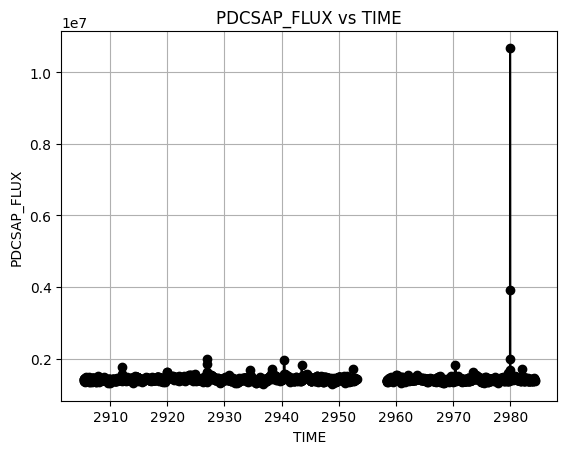

In [1]:
import matplotlib.pyplot as plt
from astropy.io import fits

fits_file = 'lightcurve_1.fits'

with fits.open(fits_file, mode = 'readonly') as hdul: 
   time = hdul[1].data['TIME']
   flux = hdul[1].data['PDCSAP_FLUX']

# Plotting the graph
plt.plot(time, flux, marker='o', linestyle='-', color='black')
plt.title('PDCSAP_FLUX vs TIME')
plt.xlabel('TIME')
plt.ylabel('PDCSAP_FLUX')
plt.grid(True)
plt.show()

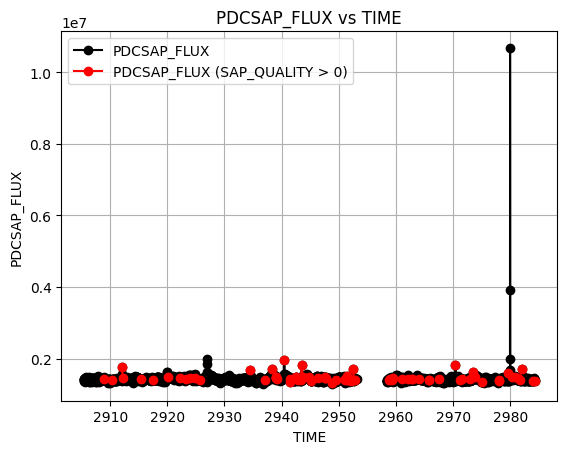

In [28]:
from astropy.io import fits
import matplotlib.pyplot as plt

# Open the fits file
fits_file = fits.open('lightcurve_1.fits')

# data is in the first HDU
data = fits_file[1].data

# Close the fits file
fits_file.close()

# Plotting the first graph: PDCSAP_FLUX vs TIME
plt.figure(1)
plt.plot(data['TIME'], data['PDCSAP_FLUX'], label='PDCSAP_FLUX', marker='o', color = 'black')
plt.xlabel('TIME')
plt.ylabel('PDCSAP_FLUX')
plt.title('PDCSAP_FLUX vs TIME')
plt.legend()

# Applying condition SAP_QUALITY > 0 for the second graph
condition = data['SAP_QUALITY'] > 0
plt.figure(1)
plt.plot(data['TIME'][condition], data['PDCSAP_FLUX'][condition], label='PDCSAP_FLUX (SAP_QUALITY > 0)', marker='o', color = 'red')
plt.legend()

plt.grid(True)
plt.show()
